<img src="https://images.emojiterra.com/google/android-12l/512px/1f4da.png"
    style="width:100px; float: right; margin: 0 10px 10px 10px;"></img>
# EDA and Data Preprocessing
**Price Prediction Model for Books (in EUR)**
***

Link to a dataset: https://zenodo.org/records/4265096

Prepared by Kate Popkova

## Table of Contents

1. [Introduction](#introduction)
2. [Understanding the Dataset](#Understanding-the-Dataset)
3. [Part 1: Data Exploration](#Part-1:-Data-Exploration)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Introduction

The book industry faces the complex challenge of pricing books in a way that maximizes profit while remaining attractive to readers. Factors influencing book prices include author popularity, genre trends, publication date, and market demand.

**Opportunities**:
1. Dynamic Pricing Strategy: Leveraging data to adjust prices in response to market demands and trends.
2. Inventory Management: Bookstores and online retailers can manage stock more efficiently by understanding which books are likely to sell at certain prices.
3. Market Analysis: Insight into which factors most significantly impact book prices can guide publishers and authors in decision-making processes, from marketing strategies to choosing publication dates.

**Who Experiences These Problems?**
- Publishers: Struggle to set optimal prices that balance profitability with market competitiveness.
- Retailers: Both online and physical bookstores need to competitively price books to maximize sales and manage inventory. 
- Authors: Especially self-published authors, who must decide on the pricing of their books without the resources of large publishing houses.

**Benefit from the Outcomes**:
- Access to a data-driven pricing model can assist in making more informed decisions, potentially increasing sales and profit margins.
- Better pricing strategies lead to improved customer satisfaction and loyalty.

#### **The Big Idea: Machine Learning Solutions**
Machine learning can revolutionize book pricing by providing a predictive model that considers a wide range of factors influencing a book's value in the market.

- Pattern Recognition: Machine learning algorithms can identify patterns and correlations between various factors (like genre popularity, author reputation, and historical sales data) and book prices.
- Predictive Analytics: By analyzing historical data, the model can forecast optimal pricing points for new or existing books.
- Customization: Machine learning models can be trained to adapt to specific market segments, genres, or geographical regions, providing tailored pricing strategies.

#### **The Impact: Societal and Business Value**

**Business Value**

- Increased Profitability: More accurate pricing leads to better sales and profit margins.
- Market Competitiveness: Businesses can stay competitive by dynamically adjusting prices in response to market trends.
- Efficient Inventory Management: Reduces the likelihood of overstocking or understocking.

**Societal Value**

- Accessibility: Properly priced books become more accessible to a broader audience, potentially increasing literacy and education.
- Author Recognition: Fair pricing strategies can lead to more equitable recognition and compensation for authors, especially those who are new or self-published.

My projects aims to build a price prediction model in the book industry. The dataset I'll be using has 52,478 records on books collected from an e-commerce platform called Iberlibro (https://www.iberlibro.com/). IberLibro is an online platform for the buying and selling of books, art and collectibles . It is trusted by independent sellers around the world to offer millions of new, second-hand and collectible books; as well as art and collecting items.

The dataset was created by two students Lorena Casanova Lozano and Sergio Costa Planells in 2020 in Barcelona, Spain. 

In this notebook, I will explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Understanding the Dataset

My dataset (books_1.Best_Books_Ever.csv) containes the following fields:

| Attributes | Definition|
|:------------|:------------|
| bookId     | Book Identifier as in goodreads.com |
| title      | Book title |
| series     | Series Name |
| author      | Book's Author |
| rating     | Global goodreads rating |
| description      | Book's description |
| language     | Book's language |
| isbn     | Book's ISBN |
| genres     | Book's genres |
| characters      | Main characters |
| bookFormat     | Type of binding |
| edition     | Type of edition (ex. Anniversary Edition) |
| pages     | Number of pages |
| publisher      | Editorial |
| publishDate      | Publication date |
| firstPublishDate      | Publication date of first edition |
| awards      | List of awards |
| numRatings      | Number of total ratings|
| likedPercent      | Derived field, percent of ratings over 2 starts (as in GoodReads) |
| setting      | Story setting |
| coverImg      | URL to cover image |
| bbeScore      | Score in Best Books Ever list |
| bbeVotes      | Number of votes in Best Books Ever list |
| price      | Book's price in EUR (extracted from Iberlibro) |



**`price`** is my target variable, and I'll be focusing on attributes relevant to book pricing, such as 
- **`author`**, 
- **`rating`**, 
- **`genres`**, 
- **`pages`**, 
- **`publisher`**, 
- **`publishDate`**, 
- **`awards`**, 
- **`numRatings`**, and 
- **`bbeScore`**.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Part 1: Data Exploration

In [41]:
# to import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
# to read the data from csv file and to do a quick sanity check
df=pd.read_csv('books_1.Best_Books_Ever.csv')
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [14]:
# to determine the number of elements
df.shape

(52478, 25)

In [8]:
# to perform a preliminary exploration of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [11]:
# to get a summary of the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,52478.0,4.021878,0.367146,0.0,3.82,4.03,4.23,5.0
numRatings,52478.0,17878.649263,103944.778529,0.0,341.00,2307.00,9380.50,7048471.0
likedPercent,51856.0,92.231545,5.990689,0.0,90.00,94.00,96.00,100.0
bbeScore,52478.0,1984.023305,35153.144366,0.0,84.00,97.00,187.00,2993816.0
bbeVotes,52478.0,22.529003,369.158541,-4.0,1.00,1.00,2.00,30516.0


The preliminary EDA reveals the following insights:

* My data has 25 columns and 52,478 rows.
* The average book rating is around 4.02, with a standard deviation of 0.37.
* The number of ratings per book varies widely, with an average of about 17,879 but a high standard deviation, indicating a large spread.
* The liked percentage averages at 92.23%, suggesting a generally positive reception for the books.
* The bbeScore and bbeVotes have a wide range, which may indicate outliers or a highly varied dataset.

Next, I will check for missing values, duplicated columns and rows, and the presence of any categorical data that may need further exploration.

In [23]:
# check the number of missing values for columns and sort them in descending order
df.isna().sum().sort_values(ascending=False)

edition             47523
series              29008
firstPublishDate    21326
price               14365
language             3806
publisher            3696
pages                2347
bookFormat           1473
description          1338
publishDate           880
likedPercent          622
coverImg              605
isbn                    0
ratingsByStars          0
bbeVotes                0
bbeScore                0
setting                 0
awards                  0
numRatings              0
genres                  0
author                  0
rating                  0
title                   0
characters              0
bookId                  0
dtype: int64

In [19]:
# check for duplicated rows
df.duplicated().sum()

50

In [20]:
# check for duplicated columns by transpose
df.T.duplicated()

bookId              False
title               False
series              False
author              False
rating              False
description         False
language            False
isbn                False
genres              False
characters          False
bookFormat          False
edition             False
pages               False
publisher           False
publishDate         False
firstPublishDate    False
awards              False
numRatings          False
ratingsByStars      False
likedPercent        False
setting             False
coverImg            False
bbeScore            False
bbeVotes            False
price               False
dtype: bool

In [31]:
# to check the data types of the columns and to determine the number of categorical and numerical values
data_types = df.dtypes
df_cat = data_types[data_types == 'object']
df_num = data_types[data_types != 'object']
df_cat, df_num

(bookId              object
 title               object
 series              object
 author              object
 description         object
 language            object
 isbn                object
 genres              object
 characters          object
 bookFormat          object
 edition             object
 pages               object
 publisher           object
 publishDate         object
 firstPublishDate    object
 awards              object
 ratingsByStars      object
 setting             object
 coverImg            object
 price               object
 dtype: object,
 rating          float64
 numRatings        int64
 likedPercent    float64
 bbeScore          int64
 bbeVotes          int64
 dtype: object)

In [32]:
df_cat = data_types[data_types == 'object'].count()
df_num = data_types[data_types != 'object'].count()
df_cat, df_num

(20, 5)

* My dataset has some missing values, notably in 'edition', 'series', and 'firstPublishDate' columns.
* My dataset also has 50 duplicated rows, but no duplicated columns.
* My dataset has 20 categorical columns and 5 numerical columns. 

Next, I will explore the distribution of one numerical column 'rating'.

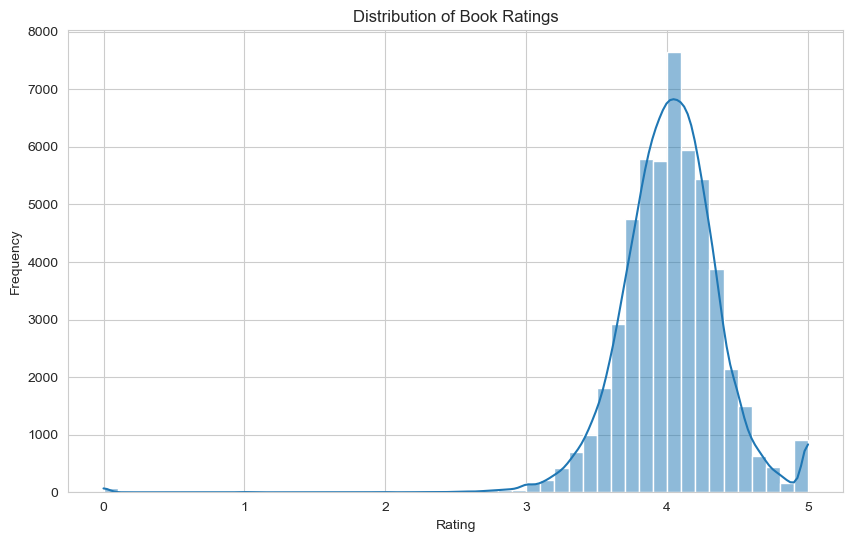

In [39]:
# Plot distribution of book ratings
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
book_ratings = df['rating'].dropna()
sns.histplot(book_ratings, bins=50, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


* The Rating Distribution is left-skewed, indicating most books have high ratings. Most books have ratings clustered around 4 stars.


For the next steps, I will do the following:
* Remove the duplicated rows to clean the dataset.
* Decide how to handle the missing values, either by filling them in or dropping them, depending on the context and importance of the data.
* Convert data types, for example, changing the 'price' column to a numeric type.
* Identify outliers and decide what to do with them, especially in 'price' column.
* Visualize the dataset further.
* Research Image Feature Extraction methods and find out if the image can correlate with the book's genre, target audience, or popularity, which might indirectly affect the price.
* Create new columns such as 'book age', 'number of characters', 'awards earned', 'number of awards'.
* Decide how to handle large text columns such as 'description' and 'setting'.